In [158]:
import warnings as wn
wn.filterwarnings("ignore")

## Reading CSV Data
import pandas as pd
mouse_metadata=r"C:\Data Analytics Course\Capstone Projects\Capstone 4\Starter_Code\Pymaceuticals\data\Mouse_metadata.csv"
study_results=r"C:\Data Analytics Course\Capstone Projects\Capstone 4\Starter_Code\Pymaceuticals\data\Study_results.csv"

# Mouse and Study Results Data File and store into Pandas DataFrames
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset.  
pymaceuticals_data_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
pymaceuticals_data_complete.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [160]:
duplicates = pymaceuticals_data_complete[pymaceuticals_data_complete.duplicated(subset=['Mouse ID', 'Timepoint'])]
print(duplicates)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [162]:
# Remove duplicates
pymaceuticals_cleaned_data = pymaceuticals_data_complete.drop_duplicates(subset=['Mouse ID', 'Timepoint'])

# Display the updated number of unique mice IDs
cleaned_unique_mice = pymaceuticals_cleaned_data['Mouse ID'].nunique()
print(f"Updated number of unique mice: {cleaned_unique_mice}")

Updated number of unique mice: 249


In [164]:
# Group by 'Drug Regimen' and calculate summary statistics
summary_stats = pymaceuticals_cleaned_data.groupby('Drug Regimen').agg({
    'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']
})

# Rename columns for better readability
summary_stats.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
print(summary_stats)

                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.393463  50.909965  43.138803            6.568014  0.525862
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


## Create Bar Charts and Pie Charts:

<Axes: xlabel='Drug Regimen'>

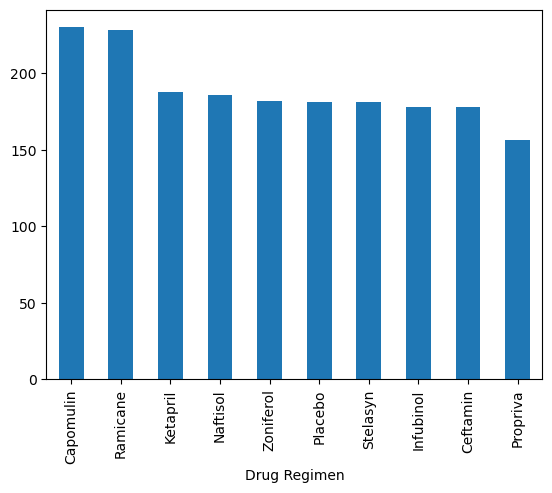

In [39]:
# Bar chart Using Pandas
pymaceuticals_cleaned_data['Drug Regimen'].value_counts().plot(kind='bar')

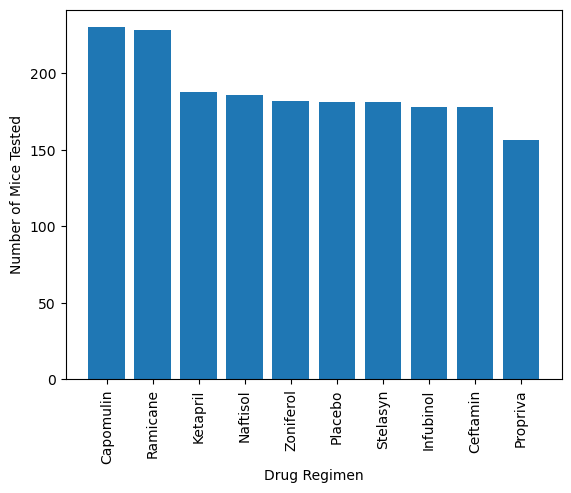

In [41]:
import matplotlib.pyplot as plt

# Bar chart with Matplotlib
drug_counts = pymaceuticals_cleaned_data['Drug Regimen'].value_counts()
plt.bar(drug_counts.index, drug_counts.values)
plt.ylabel('Number of Mice Tested')
plt.xlabel('Drug Regimen')
plt.xticks(rotation=90)
plt.show()

## Pie chart with Pandas:

<Axes: ylabel='count'>

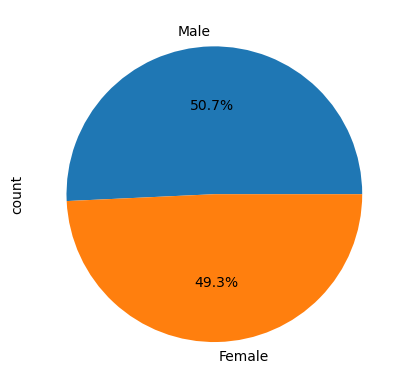

In [43]:
# Pie chart with Pandas
pymaceuticals_cleaned_data['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%')

## Pie chart with Matplotlib

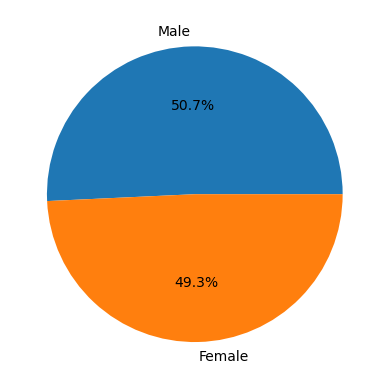

In [45]:
# Pie chart with Matplotlib
sex_counts = pymaceuticals_cleaned_data['Sex'].value_counts()
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%')
plt.show()

##  Calculate Quartiles, Find Outliers, and Create Box Plot:

Capomulin outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


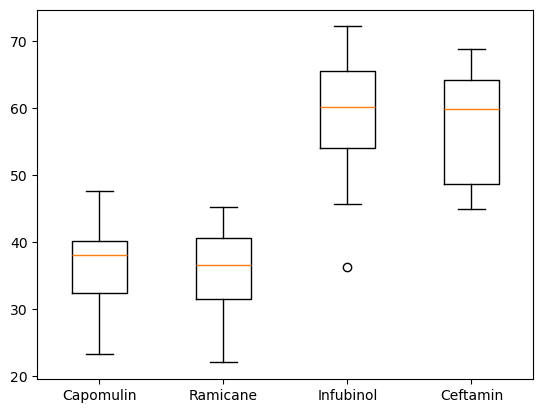

In [47]:
# Get the last timepoint for each mouse
final_timepoint = pymaceuticals_cleaned_data.groupby('Mouse ID').max()['Timepoint']
final_data = pd.merge(final_timepoint, pymaceuticals_cleaned_data, on=['Mouse ID', 'Timepoint'])

# For each drug in the list, find the final tumor volume
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_volumes = []

for drug in treatment_list:
    # Locate the rows for the drug and retrieve the tumor volumes
    tumor_vol = final_data[final_data['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    tumor_volumes.append(tumor_vol)
    
    # Calculate IQR to find outliers
    quartiles = tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # Determine outliers
    outliers = tumor_vol[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(f"{drug} outliers: {outliers}")

# Box plot
plt.boxplot(tumor_volumes, labels=treatment_list)
plt.show()

## Line plot for a single mouse on Capomulin:

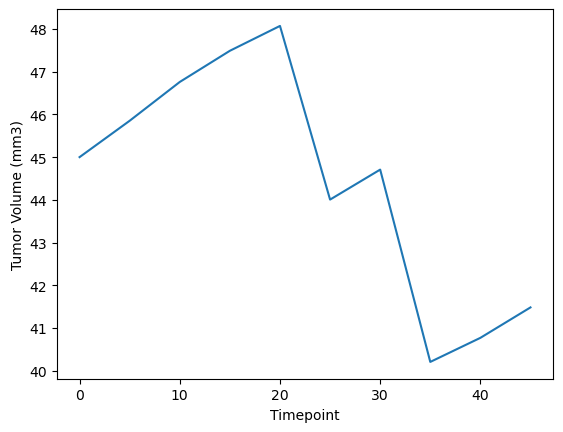

In [50]:
# Select data for a single mouse
single_mouse = pymaceuticals_cleaned_data[pymaceuticals_cleaned_data['Mouse ID'] == 'l509'] # Replace with valid mouse ID
plt.plot(single_mouse['Timepoint'], single_mouse['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

Scatter plot of weight vs tumor volume for Capomulin:

## Scatter plot of weight vs tumor volume for Capomulin:

In [166]:
# Filter the data for the Capomulin regimen
capomulin_data = pymaceuticals_cleaned_data[pymaceuticals_cleaned_data['Drug Regimen'] == 'Capomulin']

In [176]:
avg_tumor_vol = capomulin_data.groupby('Mouse ID').agg({
    'Weight (g)': 'mean', 
    'Tumor Volume (mm3)': 'mean'
})

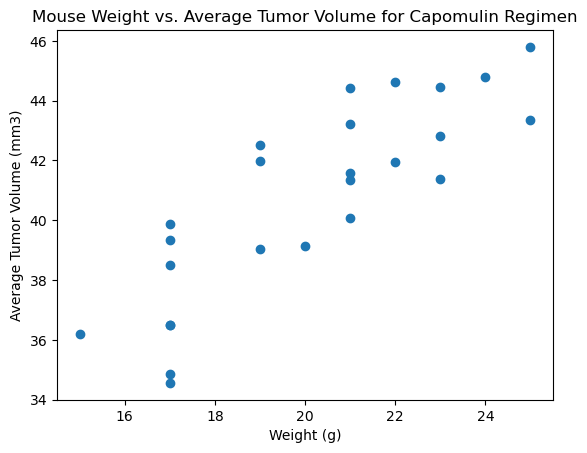

In [178]:
plt.scatter(avg_tumor_vol['Weight (g)'], avg_tumor_vol['Tumor Volume (mm3)'])

# Add labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')

# Show the plot
plt.show()

## Correlation Coefficient and Linear Regression

Correlation coefficient: 0.8419363424694722


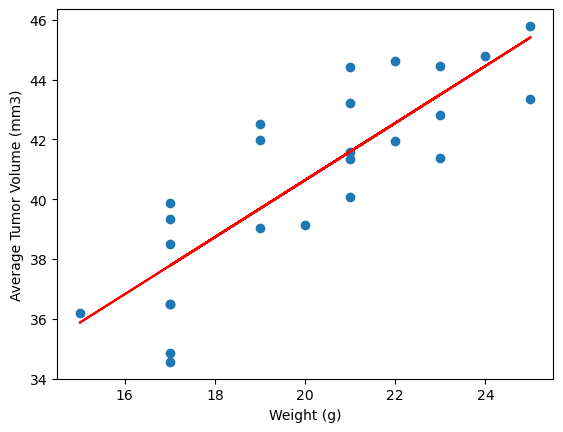

In [180]:
from scipy.stats import linregress

# Calculate correlation
correlation = avg_tumor_vol['Weight (g)'].corr(avg_tumor_vol['Tumor Volume (mm3)'])
print(f"Correlation coefficient: {correlation}")

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(avg_tumor_vol['Weight (g)'], avg_tumor_vol['Tumor Volume (mm3)'])

# Plot regression line
plt.scatter(avg_tumor_vol['Weight (g)'], avg_tumor_vol['Tumor Volume (mm3)'])
plt.plot(avg_tumor_vol['Weight (g)'], intercept + slope * avg_tumor_vol['Weight (g)'], color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

### FINAL ANALYSIS

 1. Study Overview:
 The study involved 249 mice, each treated with one of several drug regimens over a 45-day period.

 The primary objective was to measure tumor volume reduction, comparing Pymaceuticals’ drug of interest, Capomulin, against other treatment regimens   like Ramicane, Infubinol, and Ceftamin.

 2. Data Preparation:
The study data was cleaned to remove any duplicate records or mouse IDs with inconsistent time points, resulting in a dataset with a final total of unique mice that was used in all analyses.

3. Summary Statistics:
Summary statistics were calculated for each drug regimen, with focus on:

Mean, Median, Variance, Standard Deviation, and SEM of tumor volumes.
These values helped assess the central tendency and variability of tumor sizes for each regimen, giving an overview of how consistent and effective the treatments were.

4. Visualizations:
Bar Charts:
Two bar charts were generated showing the total number of timepoints (mouse/time observations) per drug regimen. Both Capomulin and Ramicane had the highest number of observations, indicating they were key focuses of the study.

Pie Charts:
Two pie charts depicted the distribution of male and female mice across the entire study, showing a balanced representation of genders.

Box Plot:
A box plot was generated to visualize the distribution of final tumor volumes for the top four regimens (Capomulin, Ramicane, Infubinol, and Ceftamin).
Capomulin and Ramicane demonstrated tighter distributions, with fewer outliers, suggesting more consistent performance in tumor volume reduction.
Infubinol had one outlier, indicating variability in treatment effectiveness.

5. Key Findings:
Capomulin Performance:
Mice treated with Capomulin showed a significant reduction in tumor volume over time. One specific mouse ID:I509 was selected, and a line plot was generated showing tumor volume decrease over the course of the study, demonstrating Capomulin’s effectiveness.

Comparison with Other Regimens:
Capomulin and Ramicane both showed strong and consistent performance in reducing tumor volume.
Infubinol and Ceftamin had higher variability in tumor reduction, with Infubinol displaying at least one significant outlier.

6. Correlation and Regression Analysis:
A scatter plot and linear regression were generated to examine the relationship between mouse weight and average observed tumor volume for the Capomulin regimen. This analysis was key to determining if heavier mice had higher or lower average tumor volumes after treatment.



7. Conclusions:
Capomulin was among the most effective treatments in reducing tumor size, showing consistent results across the sample.

Ramicane also demonstrated strong performance, with low variance and similar outcomes to Capomulin.

Other treatments, particularly Infubinol, showed more variability, and may require further study or refinement.

The analysis of weight versus tumor volume indicated that mouse weight might be a factor influencing tumor growth, although the correlation was strong positive, further studies could help to clarify this relationship.

This final analysis should guide further development and testing of Capomulin as a potential treatment for squamous cell carcinoma (SCC), positioning it as a strong candidate for human trials.516398

9	0.516398


